In [ ]:
!pip install coppeliasim_zmqremoteapi_client
!pip install numpy matplotlib pillow mediapipe


In [ ]:
!pip install opencv-python-headless

In [17]:
# !wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task
!curl https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task --output pose_landmarker.task

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [18]:
# !wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg
!curl https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg --output image.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  225k  100  225k    0     0   386k      0 --:--:-- --:--:-- --:--:--  389k


In [30]:
import numpy as np
from coppeliasim_zmqremoteapi_client import *
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

import cv2
import time

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [19]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

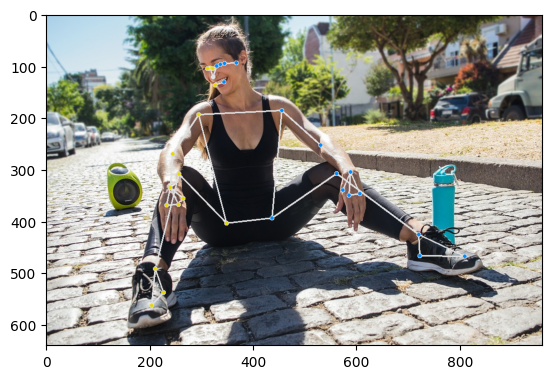

In [20]:
# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.imshow(annotated_image)

In [ ]:
detector = handDetector()

In [ ]:
factor = 100
rgbBuffer, resolution = sim.getVisionSensorImg(self.visionSens)
#.astype(np.uint8)
img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
#img_data = img_data[::-1, :, :]

image = img_data.astype(np.uint8)

img = self.detector.findHands(image)

lmList = self.detector.findPosition(image, draw=False)
if len(lmList)!=0:
    x1, y1 = lmList[4][1], lmList[4][2] # thump_tip
    x2, y2 = lmList[8][1], lmList[8][2] # index_finger_tip

    cx, cy = (x1+x2)//2, (y1+y2)//2 # find the midpoint of the line between 
    self.curr_pos = np.array([cx, 0, cy])/factor
    cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
    self.delta_pos = self.curr_pos - self.prev_pos
    
    self.prev_pos = self.curr_pos
    

    position = np.array(sim.getObjectPosition( self.target))
    new_position = position + self.delta_pos 
    sim.setObjectPosition( self.target, new_position)
#plt.imshow(img)
fps = 15
#cv2.putText(img, f'FPS: {int(fps)}', (40, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (255,0,0), 3)
#plt.imsave(f'test_{t}.png', img)


#img = cv2.rotate(img, cv2.ROTATE_180)#_COUNTERCLOCKWISE
h,w,c = img.shape
#print(h,w,c)
#img = np.transpose(img, axes=[1,0,2])

image_bytes = img.tobytes()#cv2.imencode('.png', img)[1].tobytes()
simUI.setImageData(self.ui, 5007, image_bytes, w, h)
#simUI.setImageData(self.ui, 5007, image_bytes, h, w)

In [7]:
# create a client to connect to zmqRemoteApi server:
# (creation arguments can specify different host/port,
# defaults are host='localhost', port=23000)
client = RemoteAPIClient()

# get a remote object:
sim = client.require('sim')

# call API function:
h = sim.getObject('/Floor')
print(h)

19


In [ ]:
class socialGestureCCTV:

    def __init__(self):
        # create a client to connect to zmqRemoteApi server:
        # (creation arguments can specify different host/port,
        # defaults are host='localhost', port=23000)
        self.client = RemoteAPIClient()

        # get a remote object:
        self.sim = client.require('sim')

        self.visionSensorHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint/cctv')

        self.xHandle = sim.getObject('/camera/X_Joint')
        self.yHandle = sim.getObject('/camera/X_Joint/Y_Joint')
        self.rxHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint')
        self.ryHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint')

        self.sim.setStepping(True)
        pass

    def step(self, action):

        jointAngle = sim.getJointPosition(self.rxHandle) # return radian
        np.rad2deg(jointAngle)
        

        self.sim.step()
        img = self._getImage_()
        pass

    def render(self):

        img =self._getImage_()

        pass


    def reset(self):
        self.sim.startSimulation()

        startTime = self.sim.getSimulationTime()

        self.sim.stopSimulation()
        pass

    def close(self):

        pass

    def _getImage_(self):
        rgbBuffer, resolution = sim.getVisionSensorImg(self.visionSensorHandle)
        #.astype(np.uint8)
        img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
        #img_data = img_data[::-1, :, :]

        # img_data = cv2.flip(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB), 0)
        image = img_data.astype(np.uint8)
        return image
    


In [21]:
visionSensorHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint/cctv')

xHandle = sim.getObject('/camera/X_Joint')
yHandle = sim.getObject('/camera/X_Joint/Y_Joint')
rxHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint')
ryHandle = sim.getObject('/camera/X_Joint/Y_Joint/rX_Joint/rY_Joint')

In [16]:
jointAngle = sim.getJointPosition(rxHandle) # return radian
np.rad2deg(jointAngle)

-45.00000000000296

In [ ]:
_, resolution = sim.getVisionSensorImg(visionSensorHandle)

In [54]:
factor = 100
rgbBuffer, resolution = sim.getVisionSensorImg(visionSensorHandle)
#.astype(np.uint8)
img_data = np.frombuffer(rgbBuffer, dtype=np.uint8).reshape(resolution[1], resolution[0], 3)
# img_data = cv2.flip(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB), 0)
img_data = cv2.flip(img_data, 0)
# img_data = img_data[::-1, :, :]
image = img_data.astype(np.uint8)

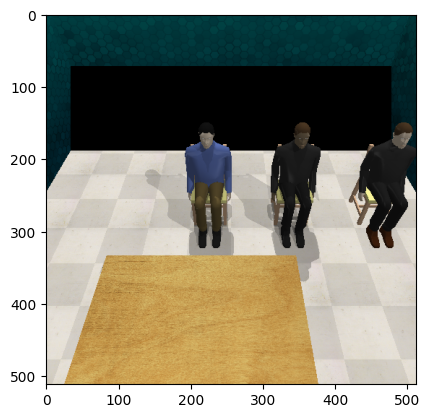

In [55]:
plt.imshow(image)

In [ ]:
# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)


In [56]:
# STEP 3: Load the input image.
image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)

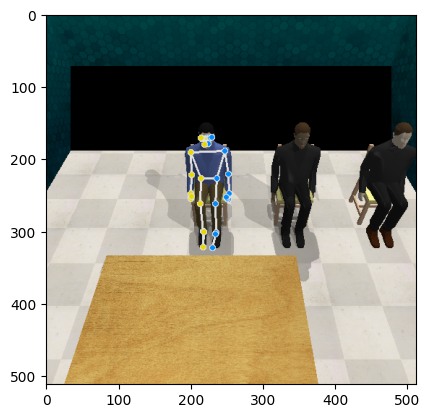

In [57]:



# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
# cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
plt.imshow(annotated_image)

In [63]:
partHandle = sim.getObject('/participant/Bill/shoes/lowerLegs/kneeJoint/upperLegs/legJoint/body/rightShoulderJoint/rightArmJoint',{'index':2})
partHandle

102

In [64]:
sim.setJointPosition(partHandle, np.pi/2)

1

In [ ]:
x = sim.getObject('')

In [22]:
sim.startSimulation()

In [13]:
sim.stopSimulation()

In [ ]:
class handDetector():

	def __init__(self, mode=False, maxHand=2, detectionCon=0.5, trackCon=0.5):
	
		self.mode = mode
		self.maxHands = maxHand
		self.detectionCon = detectionCon
		self.trackCon = trackCon

		self.mpHands = mp.solutions.hands
		self.hands = self.mpHands.Hands(self.mode, max_num_hands = self.maxHands, min_detection_confidence = self.detectionCon, min_tracking_confidence = self.trackCon)
		self.mpDraw = mp.solutions.drawing_utils


	def findHands(self, img, draw=True):
		imgRGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
		self.results = self.hands.process(imgRGB)

		if self.results.multi_hand_landmarks:
			for hand_landmarks in self.results.multi_hand_landmarks:
				if draw:
					self.mpDraw.draw_landmarks(img, hand_landmarks, connections=self.mpHands.HAND_CONNECTIONS)
		return img

		
	def findPosition(self, img, handNo=0, draw=True):
		lmList = []
		if self.results.multi_hand_landmarks:
			myHand = self.results.multi_hand_landmarks[handNo]
			for id, lm in enumerate(myHand.landmark):
				h, w, c = img.shape

				cx, cy = int(lm.x * w), int(lm.y * h)

				lmList.append([id, cx, cy])

				if draw:
					cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
		return lmList
		